# Power measurements
- **Length in ns**. Converted to `SP_POINTS = length / 2.5ns`
- **Repetitions**. Split up into batches of `R_POINTS` (rounded to 1000 for optimised kernel performance) to the digitiser.

SP-DIGITISER:   🕱 Disconnected from digitiser.
POWER-PIPELINE: Building kernel with:
R_POINTS=63488
SP_POINTS=800
POWER-PIPELINE: Performing 11 runs (to acquire 640000 averages)
🗑  Cleaning build objects
removed ‘./build/src/logging.o’
removed ‘./build/src/power_kernel_cpu.o’
removed ‘./build/src/power_kernel_gpu.o’
removed ‘./build/src/power_kernel_gpu_utils.o’
removed ‘./build/src/power_pipeline.o’
removed ‘./build/src/progress_bar.o’
removed ‘./build/src/sp_digitiser.o’
removed ‘./build/src/utils_gpu.o’
removed ‘./build/src/utils.o’
✅ [***] Done

Using flags: -D PYTHON=1 -D SP_POINTS=800 -D R_POINTS=63488 -D R_POINTS_PER_GPU_CHUNK=1024

🍕 [cpp] Building src/utils.cpp ⟶ build/./src/utils.o
🍕 [cpp] Building src/sp_digitiser.cpp ⟶ build/./src/sp_digitiser.o
🍕 [cpp] Building src/progress_bar.cpp ⟶ build/./src/progress_bar.o
🍕 [cpp] Building src/power_kernel_gpu_utils.cpp ⟶ build/./src/power_kernel_gpu_utils.o
🍕 [cpp] Building src/utils_gpu.cpp ⟶ build/./src/utils_gpu.o
🍕 [cpp] Building 

<IPython.core.display.Javascript object>


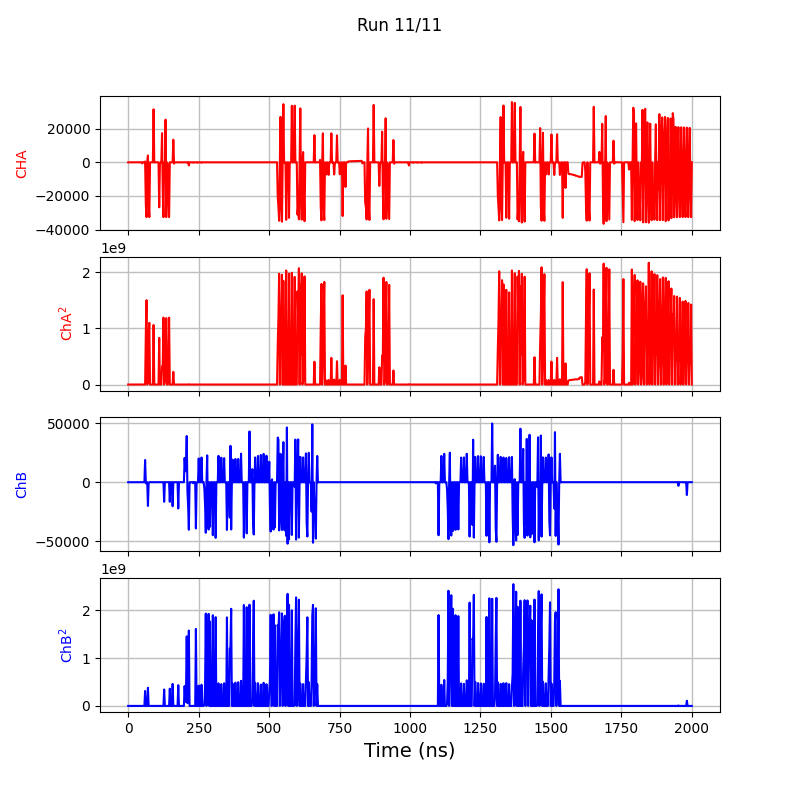

In [1]:
from python_app.sp_digitiser import SpDigitiser
from python_app.power_pipeline import PowerPipeline
from python_app.utils import file_ops
%matplotlib notebook

TIME_IN_NS = 2000  # ns
# AVERAGES = 1_000_000
AVERAGES = 640_000

pp = PowerPipeline(TIME_IN_NS, AVERAGES)

In [2]:
chA_background=None; chB_background=None
(chA_background, chB_background) = file_ops.load_chA_chB_arrays("./debug-run.csv1.csv")

pp.execute_run(
    digitiser_parameters={
        "delay": 0,
        "trigger_type": SpDigitiser.TRIGGER_EXTERNAL,
        #     "trigger_type": SpDigitiser.TRIGGER_SOFTWARE,
        "channelA_gain": 1,
        "channelB_gain": 1,
        "channelA_offset": 53,
        "channelB_offset": 34,
        "clock_source": SpDigitiser.INTERNAL_CLOCK_SOURCE_INTERNAL_10MHZ_REFFERENCE,
        "frequency_mode": SpDigitiser.HIGH_FREQUENCY_MODE
    },
    run_name="ttt",
    chA_background=chA_background, chB_background=chB_background
)

FILE-OPERATIONS:  Loaded chA and chB arrays of length SP_POINTS=20.
SP-DIGITISER:   Max Trigger frequency: 340kHz
SP-DIGITISER:   External trigger used!
POWER-PIPELINE: Measurements started


0% [███████████] 100% | ETA: 00:00:00

POWER-PIPELINE: Measurements done -> data dumped to ./dump/ttt.csv
SP-DIGITISER:   🕱 Disconnected from digitiser.



Total time elapsed: 00:00:15


In [ ]:
# Kernel must be relaunched if running in jupyter notebook in order to free the dll library being used
os._exit(0)

# Debug

In [1]:
from python_app.utils import file_ops
file_ops.load_chA_chB_arrays("./debug-run.csv1.csv")

FILE-OPERATIONS:  Loaded chA and chB arrays of length SP_POINTS=20


(array([30, 40,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
         1,  1,  1], dtype=int16),
 array([36, 38, 37, 36, 36, 34, 36, 36, 35, 35, 37, 35, 36, 35, 36, 37, 36,
        35, 38, 37], dtype=int16))

In [5]:
assert(chA.dtype == np.int)

AssertionError: 

In [2]:
chA = np.ones(SP_POINTS, dtype=np.short)


In [1]:
import ctypes

import numpy as np
from python_app.sp_digitiser import SpDigitiser
from python_app.utils import library_manager

LIBRARY_LOCATION = "./csrc/bin/libia.so"
SP_POINTS = 20
R_POINTS = 2
R_POINTS_PER_GPU_CHUNK = 1

In [2]:
library_manager.build_library(
    {
        "R_POINTS_PER_GPU_CHUNK": str(R_POINTS_PER_GPU_CHUNK),
        "SP_POINTS": str(SP_POINTS),
        "R_POINTS": str(R_POINTS),
    }
)

🗑  Cleaning build objects
removed ‘./build/src/logging.o’
removed ‘./build/src/power_kernel_cpu.o’
removed ‘./build/src/power_kernel_gpu.o’
removed ‘./build/src/power_kernel_gpu_utils.o’
removed ‘./build/src/power_pipeline.o’
removed ‘./build/src/progress_bar.o’
removed ‘./build/src/sp_digitiser.o’
removed ‘./build/src/utils_gpu.o’
removed ‘./build/src/utils.o’
✅ [***] Done

Using flags: -D PYTHON=1 -D SP_POINTS=20 -D R_POINTS=2 -D R_POINTS_PER_GPU_CHUNK=1

🍕 [cpp] Building src/utils.cpp ⟶ build/./src/utils.o
🍕 [cpp] Building src/sp_digitiser.cpp ⟶ build/./src/sp_digitiser.o
🍕 [cpp] Building src/progress_bar.cpp ⟶ build/./src/progress_bar.o
🍕 [cpp] Building src/power_kernel_gpu_utils.cpp ⟶ build/./src/power_kernel_gpu_utils.o
🍕 [cpp] Building src/utils_gpu.cpp ⟶ build/./src/utils_gpu.o
🍕 [cpp] Building src/power_kernel_cpu.cpp ⟶ build/./src/power_kernel_cpu.o
🍕 [cpp] Building src/logging.cpp ⟶ build/./src/logging.o
🍕 [cpp] Building src/power_pipeline.cpp ⟶ build/./src/power_pipeline.o


In [2]:
chA = np.ones(SP_POINTS, dtype=np.short)

chB = np.ones(SP_POINTS, dtype=np.short)

In [3]:
libia = ctypes.cdll.LoadLibrary(LIBRARY_LOCATION)

chA[0] = 30
chA[1] = 40
print(chA.ctypes.data)
# for (i, _) in enumerate(chA):
#     chA[i] = i
# for (i, _) in enumerate(chB):
#     chB[i] = i-2

spd = SpDigitiser(
    {
        "r_points": R_POINTS,
        "sp_points": SP_POINTS,
        "delay": 0,
        "trigger_type": SpDigitiser.TRIGGER_EXTERNAL,
        #     "trigger_type": SpDigitiser.TRIGGER_SOFTWARE,
        "channelA_gain": 1,
        "channelB_gain": 1,
        "channelA_offset": 0,
        "channelB_offset": 0,
        "clock_source": SpDigitiser.INTERNAL_CLOCK_SOURCE_INTERNAL_10MHZ_REFFERENCE,
        "frequency_mode": SpDigitiser.HIGH_FREQUENCY_MODE
    }
)

21137328
SP-DIGITISER:   Trigger frequency: 1300kHz
SP-DIGITISER:   External trigger used!
SP-DIGITISER:   0


In [6]:
library_manager.HANDLE_CPP_ERROR(
    libia.run_power_measurements(
        spd.adq_cu_ptr,
        chA.ctypes.data, chB.ctypes.data,
        1,
        ctypes.create_string_buffer("./debug-run.csv".encode("utf-8"), size=40)
    )
)